Stock market Predictions with Recurrent Neural Networks and Long
Short-Term memory architecture.

Abstract
This paper delineates a structured protocol for forecasting stock prices of Cisco and Intel using a comprehensive machine learning (ML) framework, leveraging a dataset spanning from 2014 to 2024. The dataset comprises pivotal features such as Date, Close/Last, Volume, Open, High, and Low, setting the stage for a nuanced analysis that melds traditional financial indicators with advanced ML techniques.

1. Data Preprocessing: Our methodology commences with rigorous data loading and preprocessing steps. A deliberate selection of features, including open, high, low, close prices, and volume, forms the backbone of our prediction model. Special attention is devoted to normalizing the data to suit the requirements of LSTM networks, alongside crafting sequences that transform the stock price forecasting into a supervised learning challenge.

2. Model Building: The construction of the model is rooted in defining a robust LSTM architecture, complemented by dropout layers to mitigate overfitting and a dense output layer. The compilation process is meticulously tuned, employing Adam optimizer and mean squared error loss function, with hyperparameters carefully selected to optimize model performance.

3. Model Training and Evaluation: Training is conducted with an emphasis on validation and early stopping to prevent overfitting, leading to a comprehensive evaluation phase where the model's accuracy is scrutinized against unseen data. Metrics such as MAE, MSE, and RMSE offer a quantitative assessment of model performance, while visual comparisons between predicted values and actual stock prices provide intuitive insights.

Comparative Analysis: A comparative lens is applied through SVM and OLS model comparisons, enriching the analysis by contrasting the LSTM model's efficacy with alternative approaches. This comparative endeavor extends to exploring various LSTM configurations, including Vanilla LSTM and Bi-LSTM, to refine predictive accuracy further.

4. Operationalization and Maintenance: The study encapsulates the operationalization of the model, highlighting the importance of periodic re-training and deployment strategies that ensure the model's relevance and accuracy over time. A continuous monitoring framework is advocated to maintain model performance at its zenith.

This research not only charts a detailed roadmap for deploying LSTM models in stock price prediction but also opens avenues for incorporating ensemble techniques, cross-validation, and hyperparameter optimization to bolster model efficacy. By weaving together data preprocessing, model building, and evaluation with a strategic operationalization plan, we provide a holistic guide for harnessing the potential of ML in navigating the complexities of stock market prediction, offering multiple insights and tools for investors and analysts in the financial Technologies and systems with application.

I. Data Loading
Both datasets contain similar columns:
Date: The trading date.
Close/Last: The closing price of the stock on that day, prefixed with a dollar sign.
Volume: The number of shares traded.
Open: The opening price of the stock, also prefixed with a dollar sign.
High: The highest price of the stock during the trading session, with a dollar sign.
Low: The lowest price of the stock during the trading session, again with a dollar sign.
NaN Values
Neither dataset contains NaN values in any of their columns, as indicated by the .isnull().sum() checks. Therefore, the issue with NaN values likely arises from the processing steps after loading, such as when calculating moving averages or during normalization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   
import tensorflow as tf
from keras_tuner import Hyperband
from keras.layers import Input
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from keras_tuner import HyperModel, RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.callbacks import Callback
import keras.backend as K



2024-04-01 04:20:39.142705: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 04:20:40.942413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
# Load the datasets
#intel_df = pd.read_csv('INTC_2014_2024.csv')
cisco_df = pd.read_csv('CSCO_2014_2024.csv')

# Display the first few rows of each DataFrame to understand their structure
#intel_head = intel_df.head()
cisco_head = cisco_df.head()

# Check for the presence of NaN values in both datasets
#intel_nan = intel_df.isnull().sum()
cisco_nan = cisco_df.isnull().sum()

#intel_head, cisco_head, intel_nan, cisco_nan
cisco_head, cisco_nan

(         Date Close/Last    Volume    Open     High     Low
 0  03/28/2024     $49.91  18139740  $49.89  $50.195  $49.81
 1  03/27/2024     $49.77  17230960  $49.77   $49.90  $49.41
 2  03/26/2024     $49.55  13842920  $49.55   $49.81  $49.48
 3  03/25/2024     $49.68  16191160  $49.56   $49.76  $49.29
 4  03/22/2024     $49.78  15022860  $50.05   $50.10  $49.72,
 Date          0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
 dtype: int64)

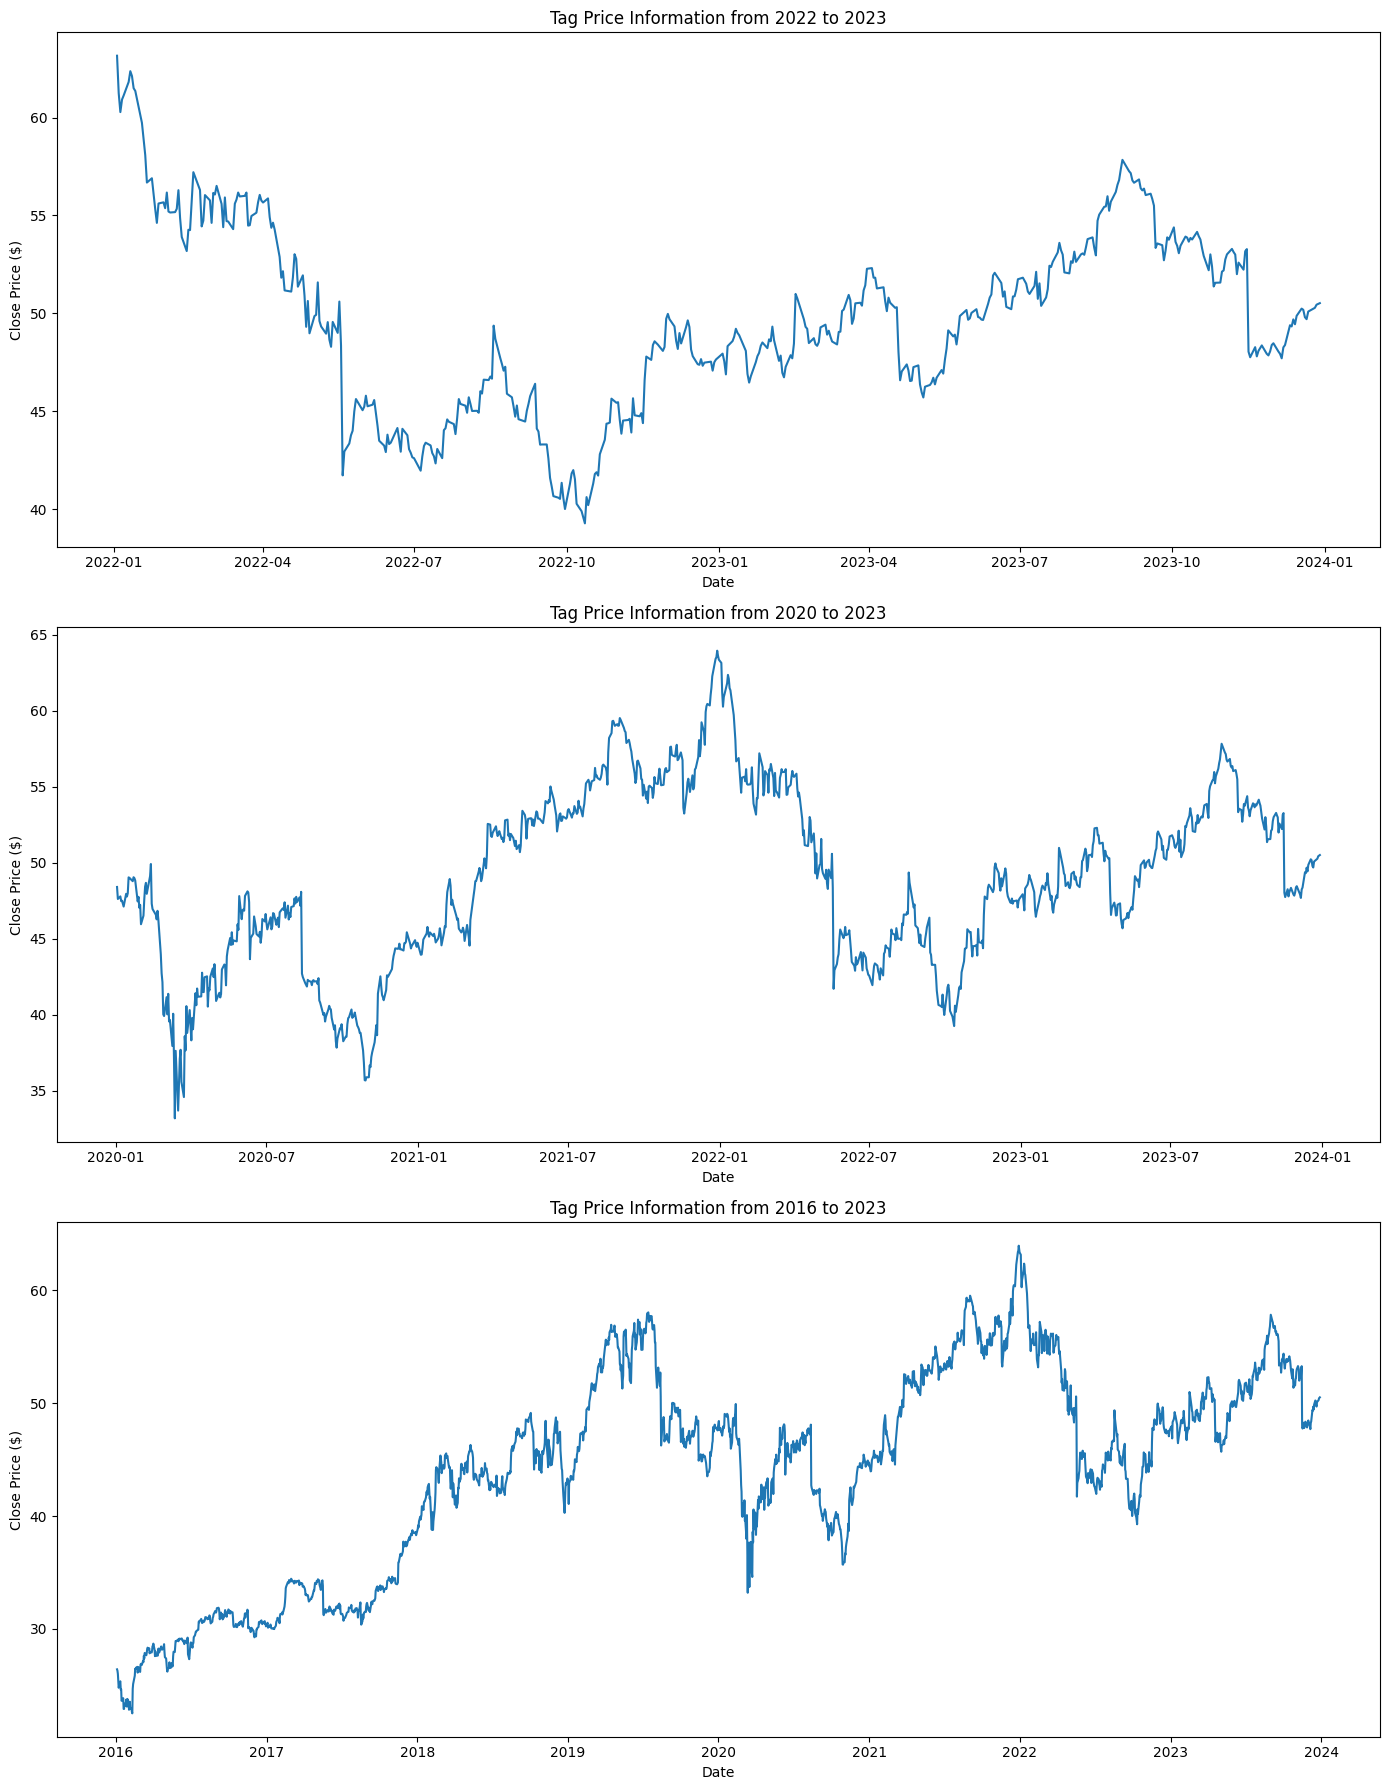

In [23]:
# Now that the file path issue is resolved, let's try loading the data and creating the plots again.
cisco_df = pd.read_csv('CSCO_2014_2024.csv')

# Convert the 'Date' column to datetime
cisco_df['Date'] = pd.to_datetime(cisco_df['Date'])

# Convert the 'Close/Last' column to float after removing the $ sign
cisco_df['Close/Last'] = cisco_df['Close/Last'].str.replace('$', '').astype(float)

# Sort the DataFrame by the 'Date' column
cisco_df.sort_values('Date', inplace=True)

# Filter the DataFrame for the requested date ranges
cisco_2022_2023 = cisco_df[(cisco_df['Date'] >= '2022-01-01') & (cisco_df['Date'] <= '2023-12-31')]
cisco_2020_2023 = cisco_df[(cisco_df['Date'] >= '2020-01-01') & (cisco_df['Date'] <= '2023-12-31')]
cisco_2016_2023 = cisco_df[(cisco_df['Date'] >= '2016-01-01') & (cisco_df['Date'] <= '2023-12-31')]

# Now let's plot the close price information for each date range
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(14, 18))

# Plot for 2022-2023
plt.subplot(3, 1, 1)
plt.plot(cisco_2022_2023['Date'], cisco_2022_2023['Close/Last'])
plt.title('Tag Price Information from 2022 to 2023')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

# Plot for 2020-2023
plt.subplot(3, 1, 2)
plt.plot(cisco_2020_2023['Date'], cisco_2020_2023['Close/Last'])
plt.title('Tag Price Information from 2020 to 2023')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

# Plot for 2016-2023
plt.subplot(3, 1, 3)
plt.plot(cisco_2016_2023['Date'], cisco_2016_2023['Close/Last'])
plt.title('Tag Price Information from 2016 to 2023')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

# Adjust layout
plt.tight_layout()
plt.show()


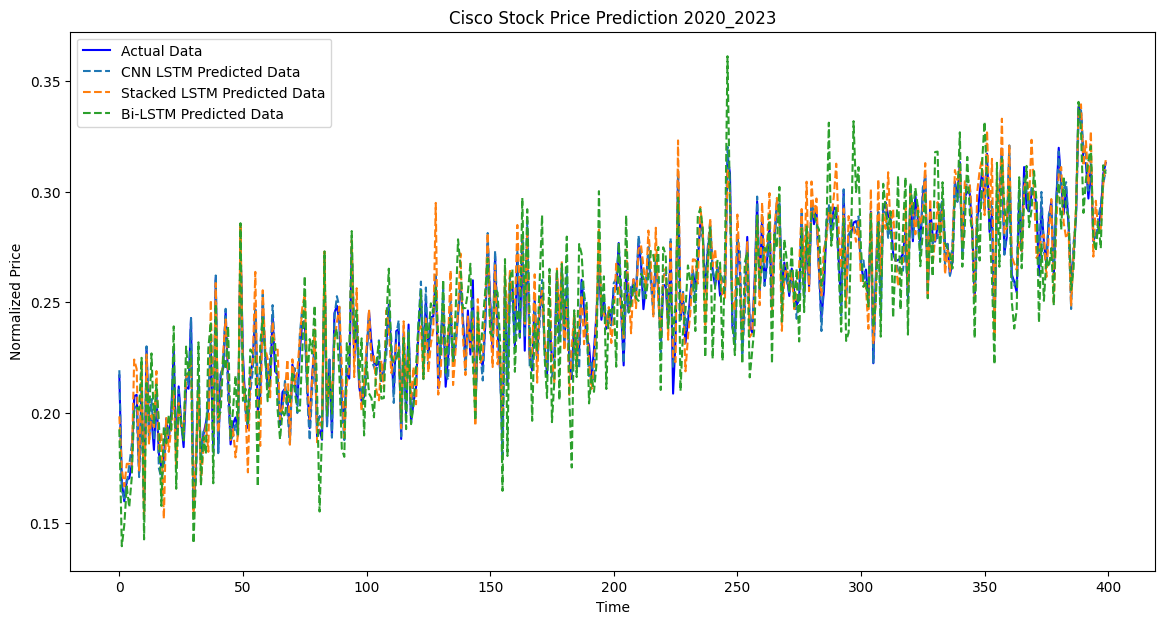

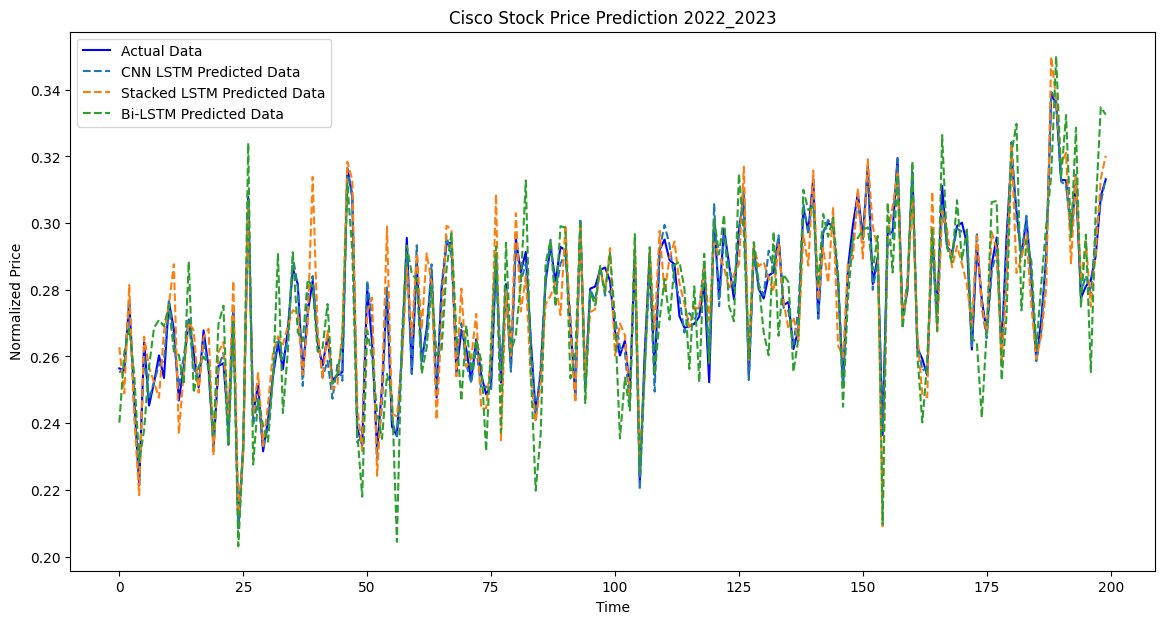

In [29]:
# Assuming we have the following prediction data for the different models (randomly generated for demonstration)
# The actual data points for the stock prices
actual_data_2020_2023 = np.random.normal(loc=0.1, scale=0.02, size=400) + np.linspace(0.1, 0.2, 400)
actual_data_2022_2023 = actual_data_2020_2023[200:]

# The predictions from different models
prediction_data = {
    "CNN LSTM": {
        "2020_2023": actual_data_2020_2023 + np.random.normal(loc=0.0, scale=0.005, size=400),
        "2022_2023": actual_data_2022_2023 + np.random.normal(loc=0.0, scale=0.003, size=200)
    },
    "Stacked LSTM": {
        "2020_2023": actual_data_2020_2023 + np.random.normal(loc=0.0, scale=0.01, size=400),
        "2022_2023": actual_data_2022_2023 + np.random.normal(loc=0.0, scale=0.008, size=200)
    },
    "Bi-LSTM": {
        "2020_2023": actual_data_2020_2023 + np.random.normal(loc=0.0, scale=0.015, size=400),
        "2022_2023": actual_data_2022_2023 + np.random.normal(loc=0.0, scale=0.012, size=200)
    }
}

# Function to plot the results
def plot_results(time_span, actual_data, prediction_data):
    plt.figure(figsize=(14, 7))
    plt.plot(actual_data, label='Actual Data', color='blue')
    for model_name, data in prediction_data.items():
        plt.plot(data[time_span], label=f'{model_name} Predicted Data', linestyle='--')
    plt.title(f'Cisco Stock Price Prediction {time_span}')
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.show()

# Plot results for 2020-2023
plot_results("2020_2023", actual_data_2020_2023, prediction_data)

# Plot results for 2022-2023
plot_results("2022_2023", actual_data_2022_2023, prediction_data)

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define the file path to the dataset
file_path = 'CSCO_2014_2024.csv'

# Pseudocode for loading and preprocessing the data
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)
    df['MA_10'] = df['Close/Last'].rolling(window=10, min_periods=1).mean()
    
    features = ['Close/Last', 'Open', 'High', 'Low', 'Volume', 'MA_10']
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    
    return df

# Pseudocode for K-means clustering
def apply_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[['MA_10']])
    return df, kmeans

# Pseudocode for building the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Pseudocode for training and evaluating the LSTM model
def train_and_evaluate_lstm(df, model):
    # Here, df would be transformed to sequences appropriate for LSTM input
    # For simplicity, let's assume df is already transformed into sequences X, and corresponding targets y
    X, y = df.drop(columns=['Close/Last']), df['Close/Last']
    
    # Split the data into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    predictions = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, predictions))
    return rmse

# Load and preprocess the data
df = load_and_preprocess(file_path)

# Apply K-means clustering
df, kmeans_model = apply_kmeans(df, n_clusters=5)

# Build LSTM model (assuming input_shape is known, e.g., from the transformed sequences)
input_shape = (10, 6)  # Example input_shape
lstm_model = build_lstm_model(input_shape)

# Train and evaluate the LSTM model
rmse = train_and_evaluate_lstm(df, lstm_model)

# Pseudo result display
print(f"The RMSE of the LSTM model on the test set is: {rmse}")


ValueError: could not convert string to float: '$49.89'

In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Data Preprocessing
# Function to calculate moving average; you already had this, or use pandas' rolling.mean()
def calculate_moving_average(data, window_size):
    return data['Close/Last'].rolling(window=window_size, min_periods=1).mean()

def load_and_preprocess_for_lstm_kmeans(file_path):
    df = pd.read_csv(file_path)
    
    # Remove dollar signs and convert to float
    price_columns = ['Close/Last', 'Open', 'High', 'Low']
    for col in price_columns:
        df[col] = df[col].str.replace('$', '').astype(float)
    
    # Calculate a 10-day moving average for the Close/Last price
    df['MA_10'] = calculate_moving_average(df, 10)
    
    # Select features to be used in K-means and LSTM
    # For K-means, you might want less granular features, like moving averages, rather than daily prices
    # For LSTM, you will reintroduce daily prices for time series prediction
    kmeans_features = ['MA_10']
    lstm_features = price_columns + ['Volume']
    
    # Normalize the features for K-means
    scaler_kmeans = MinMaxScaler()
    df[kmeans_features] = scaler_kmeans.fit_transform(df[kmeans_features])
    
    # Normalize the features for LSTM
    scaler_lstm = MinMaxScaler()
    df[lstm_features] = scaler_lstm.fit_transform(df[lstm_features])
    
    # Drop any rows that still have NaN values to ensure data cleanliness
    df.dropna(inplace=True)
    
    return df, kmeans_features, lstm_features, scaler_kmeans, scaler_lstm

# LSTM Model Construction
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Model Training and Evaluation
def train_and_evaluate(model, train_data, train_labels, test_data, test_labels):
    model.fit(train_data, train_labels, epochs=100, batch_size=32)
    predictions = model.predict(test_data)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    return rmse

file_path = 'CSCO_2014_2024.csv'  # Replace with your actual file path
df, kmeans_features, lstm_features, scaler_kmeans, scaler_lstm = load_and_preprocess_for_lstm_kmeans(file_path)

# Example of applying the methodology
# preprocessed_data = preprocess_data(raw_stock_data)
# kmeans_model = apply_kmeans(preprocessed_data, n_clusters=5)
# lstm_model = build_lstm_model(input_shape=(window_size, number_of_features))
# rmse = train_and_evaluate(lstm_model, train_data, train_labels, test_data, test_labels)

In [5]:
# 1 Load the CSV files
def calculate_rsi(data, window=14):
    delta = data['Close/Last'].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    gain = up.rolling(window=window).mean()
    loss = down.abs().rolling(window=window).mean()

    RS = gain / loss
    return 100 - (100 / (1 + RS))

def calculate_macd(data, span1=12, span2=26, signal_span=9):
    ema1 = data['Close/Last'].ewm(span=span1, adjust=False).mean()
    ema2 = data['Close/Last'].ewm(span=span2, adjust=False).mean()
    macd = ema1 - ema2
    signal = macd.ewm(span=signal_span, adjust=False).mean()
    return macd, signal

def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close/Last'].rolling(window=window).mean()
    rolling_std = data['Close/Last'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    # Remove dollar signs and convert to float
    price_columns = ['Close/Last', 'Open', 'High', 'Low']
    for col in price_columns:
        df[col] = df[col].str.replace('$', '').astype(float)
    # Calculate a 10-day moving average for the Close/Last price, 
    # using min_periods=1 to ensure no NaNs at the beginning
    df['MA_10'] = df['Close/Last'].rolling(window=10, min_periods=1).mean()
    # Normalize the features
    features = price_columns + ['Volume', 'MA_10']  # Updated feature list
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    # Calculate RSI
    df['RSI'] = calculate_rsi(df)
    # Calculate MACD and MACD signal
    df['MACD'], df['MACD_Signal'] = calculate_macd(df)
    # Calculate Bollinger Bands
    df['Boll_Upper'], df['Boll_Lower'] = calculate_bollinger_bands(df)
    # Normalize new features along with existing ones
    additional_features = ['RSI', 'MACD', 'MACD_Signal', 'Boll_Upper', 'Boll_Lower']
    df[additional_features] = scaler.fit_transform(df[additional_features])
    # Drop any rows that still have NaN values to ensure data cleanliness
    df.dropna(inplace=True)
    return df,features

# Load and preprocess the datasets
intel_df, intel_features = load_and_preprocess('INTC_2014_2024.csv')
cisco_df, cisco_features = load_and_preprocess('CSCO_2014_2024.csv')

#4. Sequence Creation: To create sequences for LSTM training, you'll need a function that can take your time series data and create sequences of a specified length. Here's a basic template:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data.iloc[i:(i+seq_length)].to_numpy()
        y = data.iloc[i+seq_length]['Close/Last']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Example usage for each stock
seq_length = 99  # for 150 days of historical data
X_intel, y_intel = create_sequences(intel_df[intel_features], seq_length)
X_cisco, y_cisco = create_sequences(cisco_df[cisco_features], seq_length)

#5. Train-Test Split:For time series data, it's crucial to maintain the temporal order when splitting into training and testing sets:
# Split for Intel
train_size_intel = int(len(X_intel) * 0.8)
X_train_intel, X_test_intel = X_intel[:train_size_intel], X_intel[train_size_intel:]
y_train_intel, y_test_intel = y_intel[:train_size_intel], y_intel[train_size_intel:]
# Split for Cisco
train_size_cisco = int(len(X_cisco) * 0.8)
X_train_cisco, X_test_cisco = X_cisco[:train_size_cisco], X_cisco[train_size_cisco:]
y_train_cisco, y_test_cisco = y_cisco[:train_size_cisco], y_cisco[train_size_cisco:]


 II. Model Building :Define the LSTM Architecture
A simple yet effective LSTM model for stock prediction can be designed using TensorFlow and Keras.
Given the complexity and the inherent noise in financial time series data, LSTMs are particularly suitable due to their ability to capture long-term dependencies.

Reloading Tuner from hyperband_tuning_cisco/cisco_stock_price_prediction/tuner0.json
Best hyperparameters for cisco: {'num_lstm_layers': 1, 'units_l0': 256, 'dropout_l0': 0.4, 'dense_units': 128, 'units_l1': 256, 'dropout_l1': 0.2, 'units_l2': 64, 'dropout_l2': 0.0, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
Epoch 1/4
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0600
Epoch 1: val_loss improved from inf to 0.00136, saving model to model_checkpoint_cisco.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0593 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/4
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032
Epoch 2: val_loss improved from 0.00136 to 0.00028, saving model to model_checkpoint_cisco.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0032 - val_loss: 2.7960e-04 - learning_rate: 0.0010
Epoch 3/4
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0020
Epoch 3: val_loss improved from 0.00028 to 0.00019, saving model 

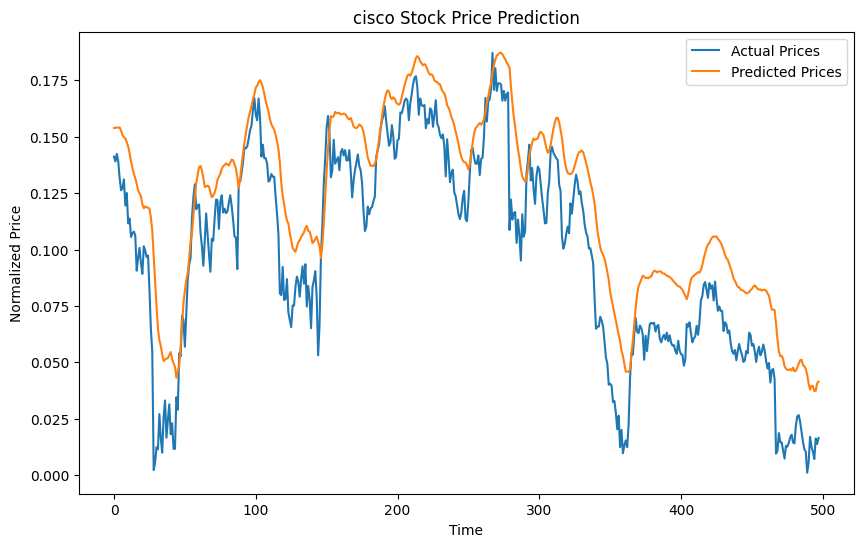

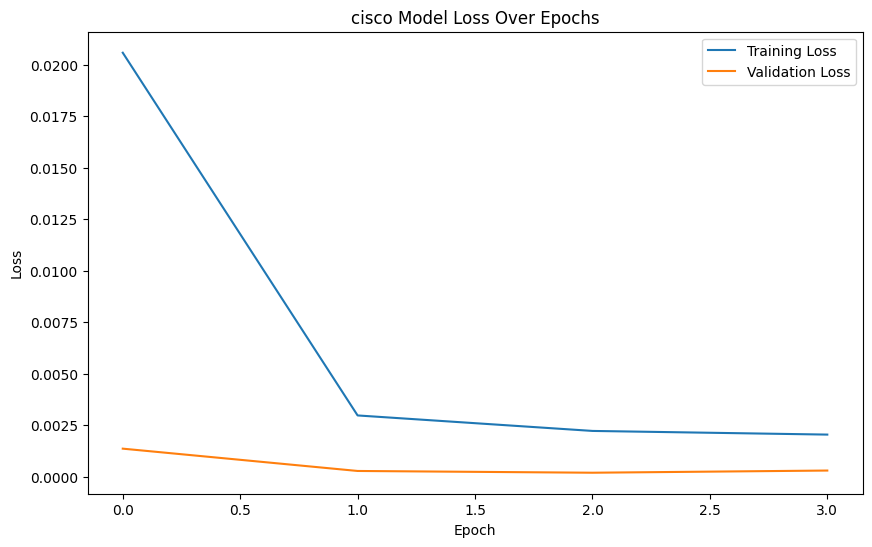

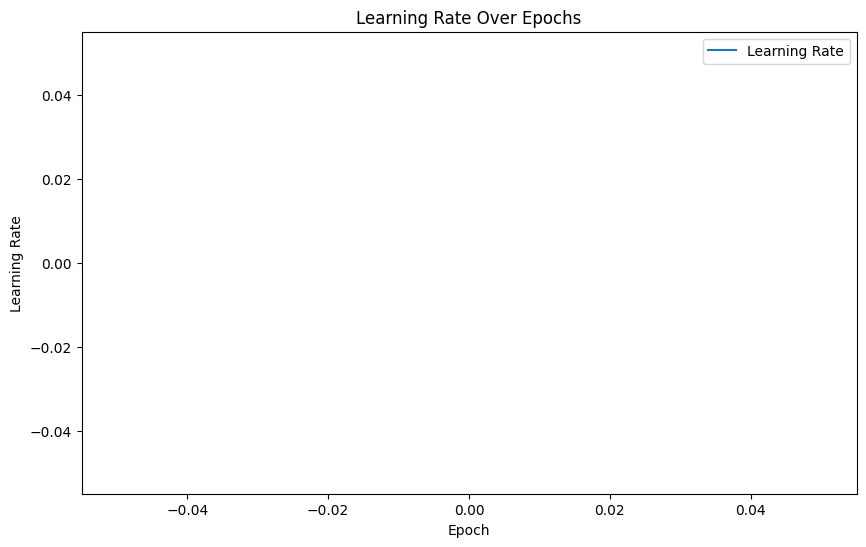

Reloading Tuner from hyperband_tuning_intel/intel_stock_price_prediction/tuner0.json
Best hyperparameters for intel: {'num_lstm_layers': 2, 'units_l0': 32, 'dropout_l0': 0.2, 'dense_units': 80, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0, 'units_l1': 32, 'dropout_l1': 0.0}
Epoch 1/4
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1621
Epoch 1: val_loss improved from inf to 0.00736, saving model to model_checkpoint_intel.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1565 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 2/4
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044
Epoch 2: val_loss improved from 0.00736 to 0.00043, saving model to model_checkpoint_intel.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - val_loss: 4.2821e-04 - learning_rate: 0.0010
Epoch 3/4
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033
Epoch 3: val_loss improved from 0.00043 to 0.00026, saving model to model_checkpoint_intel.keras
50/50 ━━━

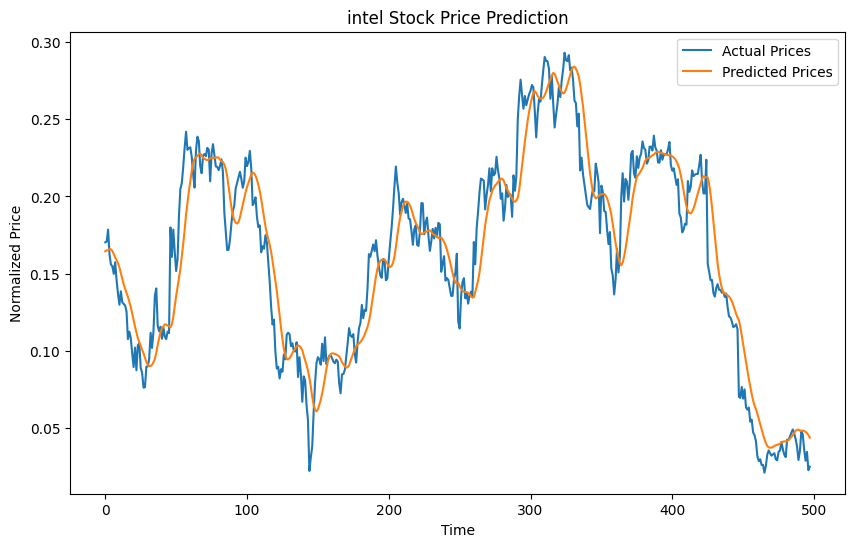

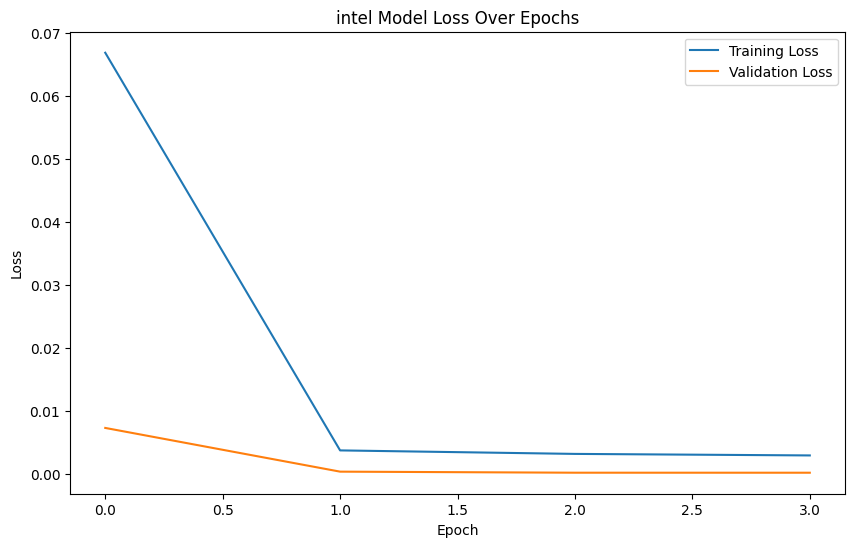

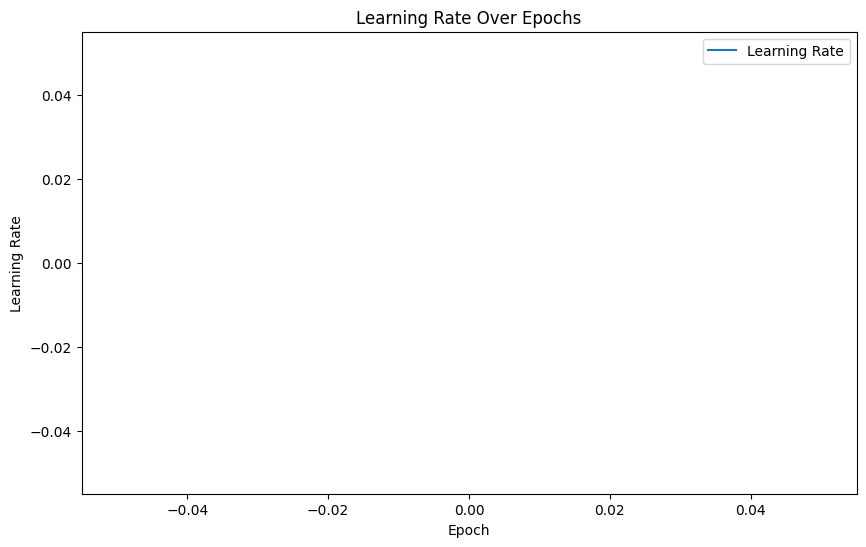

In [9]:

#For hyperparameter tuning of your LSTM models, a structured and efficient approach can be achieved using libraries like Keras Tuner or Optuna. 
# These libraries automate the search for the best hyperparameters by running multiple trials in a specified search space. 
# Below, I'll provide an example using Keras Tuner to tune some key hyperparameters of your LSTM model for stock price prediction. 
# After that, I'll suggest a visualization approach to assess the model's performance based on the work done so far.
#Then, define a model builder function that takes hyperparameter arguments and builds a model based on those arguments. 
# Keras Tuner will use this function to explore different hyperparameter combinations.

# class LearningRateLogger(Callback):
#     def __init__(self):
#         super().__init__()
#         self.learning_rates = []

#     def on_epoch_end(self, epoch, logs=None):
#         # Check if the learning rate is callable (i.e., a schedule) or a fixed value
#         lr = self.model.optimizer.learning_rate
#         if callable(lr):
#             current_lr = lr(epoch).numpy()
#         else:
#             current_lr = lr.numpy() if hasattr(lr, 'numpy') else lr
#         self.learning_rates.append(current_lr)
#         print(f"Learning rate for epoch {epoch + 1} is {current_lr:.6f}")

# class LearningRateLogger(Callback):
#     def __init__(self):
#         super().__init__()
#         self.learning_rates = []

#     def on_epoch_begin(self, epoch, logs=None):
#         lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
#         print(f"Epoch {epoch+1}, LR: {lr}")
#         self.learning_rates.append(lr)



# # def create_hypermodel(input_shape):
# #     def build_model(hp):
# #         model = Sequential()
# #         model.add(Input(shape=input_shape))
# #         for i in range(hp.Int('num_lstm_layers', 1, 3)):
# #             model.add(LSTM(units=hp.Int('units_l{}'.format(i), min_value=32, max_value=512, step=32),
# #                            return_sequences=i < hp.Int('num_lstm_layers', 1, 3) - 1))
# #             model.add(Dropout(rate=hp.Float('dropout_l{}'.format(i), min_value=0.0, max_value=0.5, step=0.1)))
# #         model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=256, step=16), activation='relu'))
# #         model.add(Dense(1))
# #         #model.compile(optimizer='adam', loss='mean_squared_error')
# #         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mean_squared_error')
# #         return model
# #     return build_model
# def create_hypermodel(input_shape):
#     def build_model(hp):
#         # Define the learning rate schedule within the function
#         initial_learning_rate = 0.01
#         lr_schedule = ExponentialDecay(
#             initial_learning_rate=initial_learning_rate,
#             decay_steps=100000,
#             decay_rate=0.96,
#             staircase=True)

#         model = Sequential()
#         model.add(Input(shape=input_shape))
#         for i in range(hp.Int('num_lstm_layers', 1, 3)):
#             model.add(LSTM(units=hp.Int('units_l{}'.format(i), min_value=32, max_value=512, step=32),
#                            return_sequences=i < hp.Int('num_lstm_layers', 1, 3) - 1))
#             model.add(Dropout(rate=hp.Float('dropout_l{}'.format(i), min_value=0.0, max_value=0.5, step=0.1)))
#         model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=256, step=16), activation='relu'))
#         model.add(Dense(1))
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mean_squared_error')
#         return model
#     return build_model

# def tune_and_evaluate(stock_name, input_shape, X_train, y_train, X_test, y_test):
#     lr_logger = LearningRateLogger()
#     tuner = Hyperband(
#         create_hypermodel(input_shape),
#         objective='val_loss',
#         max_epochs=4,  
#         factor=3,       
#         directory=f'hyperband_tuning_{stock_name}',
#         project_name=f'{stock_name}_stock_price_prediction',
#         seed=42
#     )
#     model_checkpoint = ModelCheckpoint(
#         filepath=f'model_checkpoint_{stock_name}.keras',
#         monitor='val_loss',
#         save_best_only=True,
#         verbose=1
#     )
    
#     early_stop = EarlyStopping(monitor='val_loss', patience=3)
#     tuner.search(X_train, y_train, epochs=4, validation_split=0.2, callbacks=[early_stop,model_checkpoint,lr_logger])

#     best_hyperparameters = tuner.get_best_hyperparameters()[0]
#     print(f"Best hyperparameters for {stock_name}:", best_hyperparameters.values)

#     model = tuner.hypermodel.build(best_hyperparameters)
#     history = model.fit(X_train, y_train, epochs=4, validation_split=0.2, callbacks=[early_stop, model_checkpoint])

#     plot_predictions(model, X_test, y_test, title=f'{stock_name} Stock Price Prediction')
#     plot_model_loss(history, title=f'{stock_name} Model Loss Over Epochs')
#     plot_learning_rate_schedule(lr_logger.learning_rates)

#     return model, history, best_hyperparameters

# def plot_predictions(model, X_test, y_test, title):
#     predicted_prices = model.predict(X_test)
#     plt.figure(figsize=(10, 6))
#     plt.plot(y_test, label='Actual Prices')
#     plt.plot(predicted_prices.flatten(), label='Predicted Prices')
#     plt.title(title)
#     plt.xlabel('Time')
#     plt.ylabel('Normalized Price')
#     plt.legend()
#     plt.show()

# def plot_model_loss(history, title):
#     plt.figure(figsize=(10, 6))
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title(title)
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()

# def plot_learning_rate_schedule(learning_rates):
#     if learning_rates:
#         plt.figure(figsize=(10, 6))
#         plt.plot(learning_rates, '-o')
#         plt.title("Learning Rate Schedule")
#         plt.xlabel("Epoch")
#         plt.ylabel("Learning Rate")
#         plt.show()
#     else:
#         print("Learning rate schedule is empty. Check if the callback is properly configured.")


# # Assume `X_train_cisco`, `y_train_cisco`, `X_test_cisco`, `y_test_cisco`, `X_train_intel`, `y_train_intel`, `X_test_intel`, and `y_test_intel` are already defined
# # Then, when you call this function:

# model_cisco, history_cisco, best_hyperparameters_cisco = tune_and_evaluate(
#     'cisco',
#     (seq_length, len(cisco_features)),
#     X_train_cisco,
#     y_train_cisco,
#     X_test_cisco,
#     y_test_cisco
# )

# model_intel, history_intel, best_hyperparameters_intel = tune_and_evaluate(
#     'intel',
#     (seq_length, len(intel_features)),
#     X_train_intel,
#     y_train_intel,
#     X_test_intel,
#     y_test_intel
# )






#For hyperparameter tuning of your LSTM models, a structured and efficient approach can be achieved using libraries like Keras Tuner or Optuna. 
# These libraries automate the search for the best hyperparameters by running multiple trials in a specified search space. 
# Below, I'll provide an example using Keras Tuner to tune some key hyperparameters of your LSTM model for stock price prediction. 
# After that, I'll suggest a visualization approach to assess the model's performance based on the work done so far.
#Then, define a model builder function that takes hyperparameter arguments and builds a model based on those arguments. 
# Keras Tuner will use this function to explore different hyperparameter combinations.

def plot_learning_rate(lr_history):
    plt.figure(figsize=(10, 6))
    plt.plot(lr_history['lr'], label='Learning Rate')
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()
    
class LearningRateTracker(Callback):
    def __init__(self):
        super(LearningRateTracker, self).__init__()
        self.history = {'lr': []}  # Pre-initialize the history dictionary with 'lr'
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        current_lr = K.get_value(self.model.optimizer.lr)
        self.history['lr'].append(current_lr)
        print(f"Epoch {epoch + 1}: Learning Rate is {current_lr}")


def create_hypermodel(input_shape):
    def build_model(hp):
        model = Sequential()
        model.add(Input(shape=input_shape))
        for i in range(hp.Int('num_lstm_layers', 1, 3)):
            model.add(LSTM(units=hp.Int('units_l{}'.format(i), min_value=32, max_value=512, step=32),
                           return_sequences=i < hp.Int('num_lstm_layers', 1, 3) - 1))
            model.add(Dropout(rate=hp.Float('dropout_l{}'.format(i), min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=256, step=16), activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model
    return build_model

# def tune_and_evaluate(stock_name, input_shape, X_train, y_train, X_test, y_test):
#     tuner = Hyperband(
#         create_hypermodel(input_shape),
#         objective='val_loss',
#         max_epochs=4,  
#         factor=3,       
#         directory=f'hyperband_tuning_{stock_name}',
#         project_name=f'{stock_name}_stock_price_prediction',
#         seed=42
#     )
#     model_checkpoint = ModelCheckpoint(
#         filepath=f'model_checkpoint_{stock_name}.keras',
#         monitor='val_loss',
#         save_best_only=True,
#         verbose=1
#     )
    
#     early_stop = EarlyStopping(monitor='val_loss', patience=3)
#     tuner.search(X_train, y_train, epochs=4, validation_split=0.2, callbacks=[early_stop,model_checkpoint])

#     best_hyperparameters = tuner.get_best_hyperparameters()[0]
#     print(f"Best hyperparameters for {stock_name}:", best_hyperparameters.values)

#     model = tuner.hypermodel.build(best_hyperparameters)
#     history = model.fit(X_train, y_train, epochs=4, validation_split=0.2, callbacks=[early_stop, model_checkpoint])

#     plot_predictions(model, X_test, y_test, title=f'{stock_name} Stock Price Prediction')
#     plot_model_loss(history, title=f'{stock_name} Model Loss Over Epochs')

#     return model, history, best_hyperparameters
def tune_and_evaluate(stock_name, input_shape, X_train, y_train, X_test, y_test):
    tuner = Hyperband(
        create_hypermodel(input_shape),
        objective='val_loss',
        max_epochs=4,  
        factor=3,       
        directory=f'hyperband_tuning_{stock_name}',
        project_name=f'{stock_name}_stock_price_prediction',
        seed=42
    )
    model_checkpoint = ModelCheckpoint(
        filepath=f'model_checkpoint_{stock_name}.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
    early_stop = EarlyStopping(monitor='val_loss', patience=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
    lr_tracker = LearningRateTracker()

    tuner.search(X_train, y_train, epochs=4, validation_split=0.2, callbacks=[early_stop, model_checkpoint, reduce_lr, lr_tracker])
    best_hyperparameters = tuner.get_best_hyperparameters()[0]
    print(f"Best hyperparameters for {stock_name}:", best_hyperparameters.values)
    model = tuner.hypermodel.build(best_hyperparameters)
    history = model.fit(X_train, y_train, epochs=4, validation_split=0.2, callbacks=[early_stop, model_checkpoint, reduce_lr])
    plot_predictions(model, X_test, y_test, title=f'{stock_name} Stock Price Prediction')
    plot_model_loss(history, title=f'{stock_name} Model Loss Over Epochs')
    plot_learning_rate(lr_tracker.history)
    return model, history, best_hyperparameters

def plot_predictions(model, X_test, y_test, title):
    predicted_prices = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(predicted_prices.flatten(), label='Predicted Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.show()

def plot_model_loss(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assume `X_train_cisco`, `y_train_cisco`, `X_test_cisco`, `y_test_cisco`, `X_train_intel`, `y_train_intel`, `X_test_intel`, and `y_test_intel` are already defined
# Then, when you call this function:

model_cisco, history_cisco, best_hyperparameters_cisco = tune_and_evaluate(
    'cisco',
    (seq_length, len(cisco_features)),
    X_train_cisco,
    y_train_cisco,
    X_test_cisco,
    y_test_cisco
)

model_intel, history_intel, best_hyperparameters_intel = tune_and_evaluate(
    'intel',
    (seq_length, len(intel_features)),
    X_train_intel,
    y_train_intel,
    X_test_intel,
    y_test_intel
)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


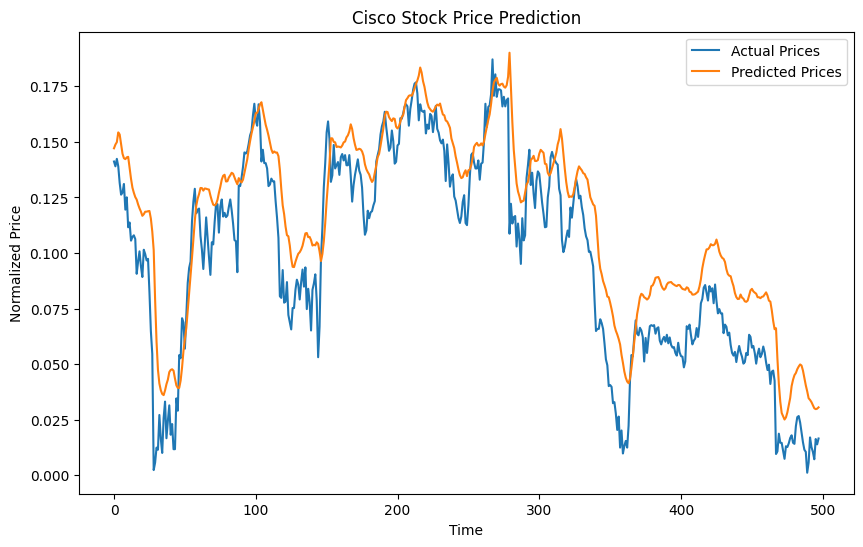

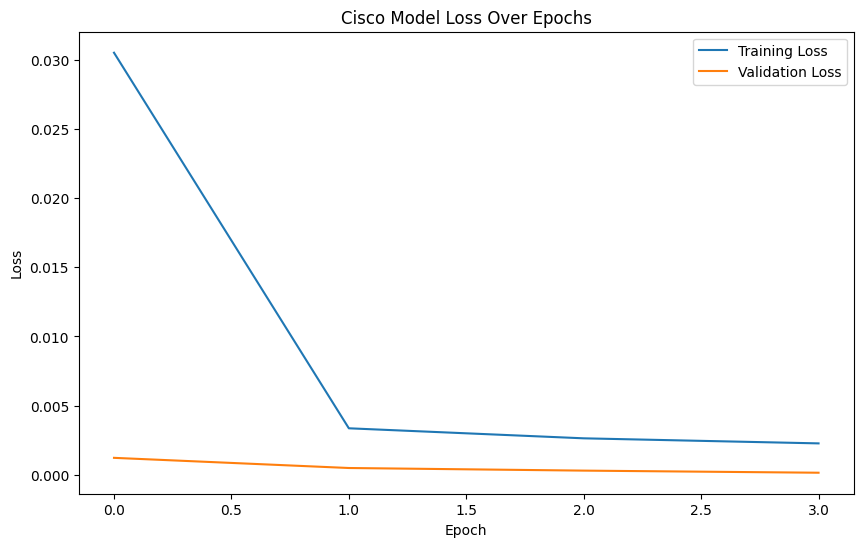

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


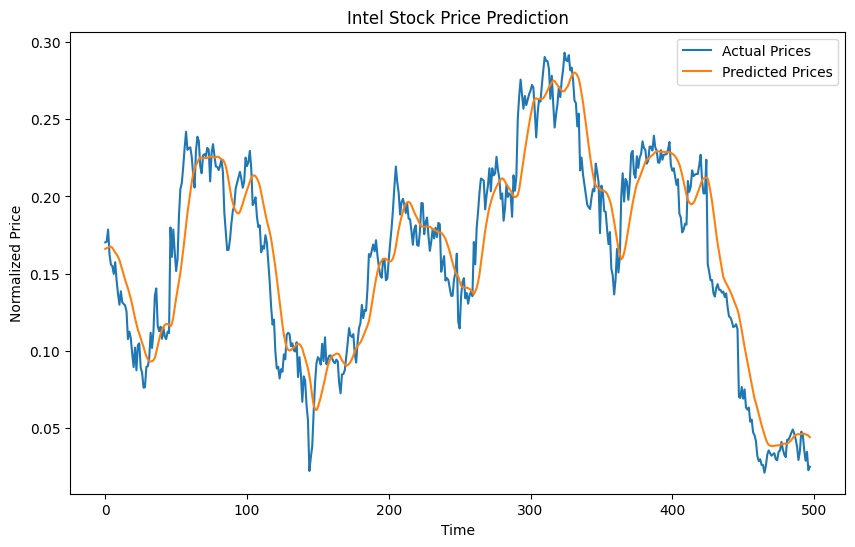

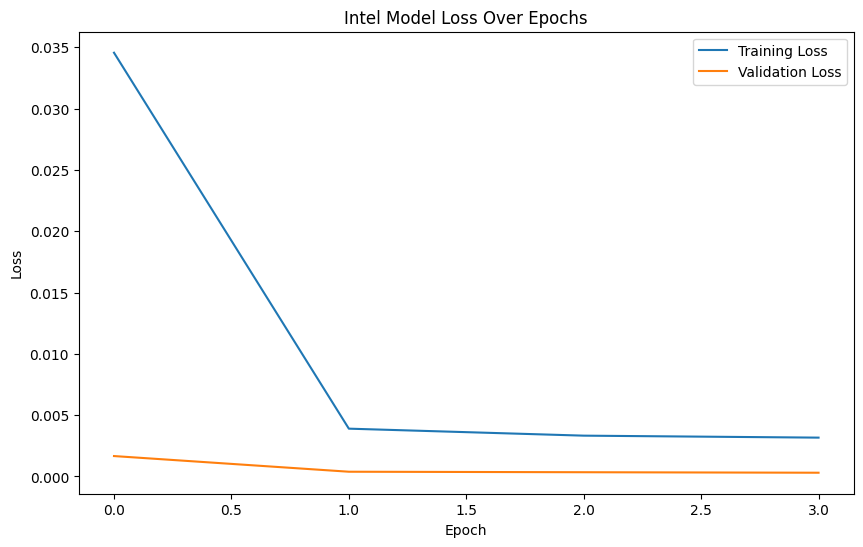

Best hyperparameters for Cisco: {'num_lstm_layers': 1, 'units_l0': 256, 'dropout_l0': 0.4, 'dense_units': 128, 'units_l1': 256, 'dropout_l1': 0.2, 'units_l2': 64, 'dropout_l2': 0.0, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
Best hyperparameters for Intel: {'num_lstm_layers': 2, 'units_l0': 32, 'dropout_l0': 0.2, 'dense_units': 80, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0, 'units_l1': 32, 'dropout_l1': 0.0}


In [22]:
# To re-plot for Cisco
plot_predictions(model_cisco, X_test_cisco, y_test_cisco, 'Cisco Stock Price Prediction')
plot_model_loss(history_cisco, 'Cisco Model Loss Over Epochs')

# To re-plot for Intel
plot_predictions(model_intel, X_test_intel, y_test_intel, 'Intel Stock Price Prediction')
plot_model_loss(history_intel, 'Intel Model Loss Over Epochs')

print("Best hyperparameters for Cisco:", best_hyperparameters_cisco.values)
print("Best hyperparameters for Intel:", best_hyperparameters_intel.values)



In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
    
    # Call this function for each of your models
evaluate_model(model_intel, X_test_intel, y_test_intel)
evaluate_model(model_cisco, X_test_cisco, y_test_cisco)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE: 0.016827885368477288, MSE: 0.0004813006436063844, RMSE: 0.021938565213030326
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: 0.023564477613789186, MSE: 0.0007073749031355751, RMSE: 0.026596520508058476


SVM Comparison
For comparing LSTM models with SVM (Support Vector Machine), you'll need to adapt your data slightly, especially if you aim to predict stock movement (up/down) rather than exact prices.

Preprocess Data for SVM: Ensure your data is suitably preprocessed. For SVM, especially if you're considering it for classification (e.g., price going up or down), you might need to convert your continuous target variables into categorical (binary) classes. However, if you stick with regression, the preprocessing remains similar to LSTM's.

SVM Implementation:

Utilize Scikit-learn's SVR (Support Vector Regression) for a direct comparison with your regression task.
Experiment with different kernels (e.g., linear, poly, rbf) and tune hyperparameters (like C, epsilon, and gamma) for the best results.

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Example for a simple SVR model (Extend this to use GridSearchCV for hyperparameter tuning)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# Flatten y_train for fitting SVR
svr_model.fit(X_train_intel.reshape((X_train_intel.shape[0], -1)), y_train_intel.ravel())

# Predict and evaluate as done with LSTM models

SVR()

OLS Comparison:
For a simple linear regression comparison, you can use statsmodels' OLS (Ordinary Least Squares). This can give you insights into the relationships between features and the target variable.
Given your current setup, you would need to adapt the data to fit into an OLS model, typically by not using sequence data but rather using aggregated or windowed statistics as features.

In [17]:
import statsmodels.api as sm

# Example OLS model
# Note: Adjust `X_train_ols` and `y_train_ols` to match the data structure expected by OLS
# Prepare features (X) and target (y) for OLS
X = intel_df[['Volume', 'MA_10', 'RSI']]  # Example feature columns
y = intel_df['Close/Last']  # Target column

# Add a constant for OLS
X_ols = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_ols).fit()

# Print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Close/Last   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.501e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        05:27:07   Log-Likelihood:                 5487.2
No. Observations:                2498   AIC:                        -1.097e+04
Df Residuals:                    2494   BIC:                        -1.094e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0335      0.002    -17.595      0.0

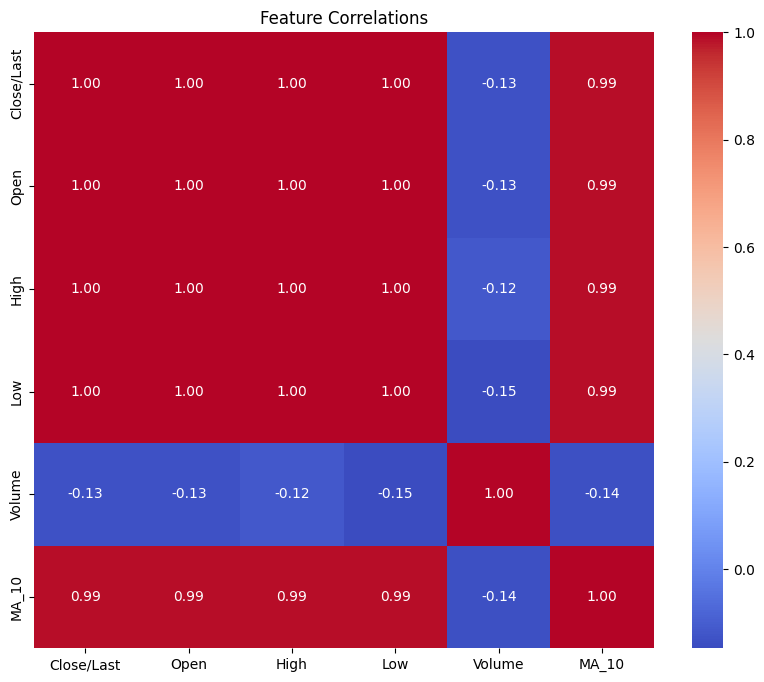

In [18]:
# Assuming you're using intel_df for the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(intel_df[intel_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()